#

# **Import Library**

In [2]:
# import after file upload
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **Load dataset**

In [3]:

# Load the uploaded dataset
file_path = "/content/malicious_phish.csv" # Corrected file path
df = pd.read_csv(file_path)

In [4]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


# **Preprocessing and Feature Engineering**

In [5]:

# Basic preprocessing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['url'] = df['url'].str.lower()

# Feature engineering
df['url_length'] = df['url'].apply(len)
df['has_https'] = df['url'].apply(lambda x: 'https' in x).astype(int)
df['num_dots'] = df['url'].apply(lambda x: x.count('.'))
df['has_ip'] = df['url'].str.contains(r'\d+\.\d+\.\d+\.\d+').astype(int)


In [6]:
df

,url,type,url_length,has_https,num_dots,has_ip
0,br-icloud.com.br,phishing,16,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,3,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,2,0
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,39,0,3,0
651187,games.teamxbox.com/xbox-360/1860/dead-space/,phishing,44,0,2,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,42,0,2,0
651189,en.wikipedia.org/wiki/dead_space_(video_game),phishing,45,0,2,0


In [7]:
df.head(10)

,url,type,url_length,has_https,num_dots,has_ip
0,br-icloud.com.br,phishing,16,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,3,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,2,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,118,0,2,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,45,0,2,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,46,0,1,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,44,0,2,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,45,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641125 entries, 0 to 651190
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   url         641125 non-null  object
 1   type        641125 non-null  object
 2   url_length  641125 non-null  int64 
 3   has_https   641125 non-null  int64 
 4   num_dots    641125 non-null  int64 
 5   has_ip      641125 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 34.2+ MB


# **EDA**

/tmp/ipython-input-9-494815931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


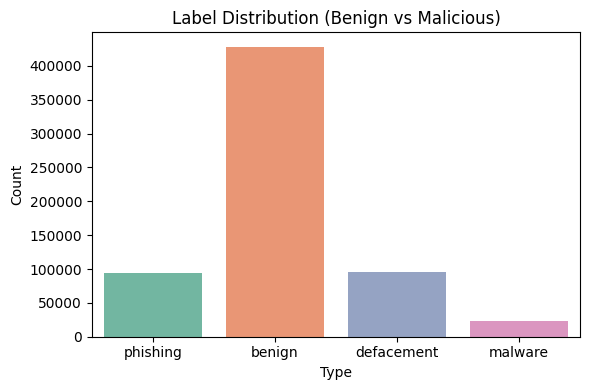

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Label Distribution (Benign vs Malicious)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

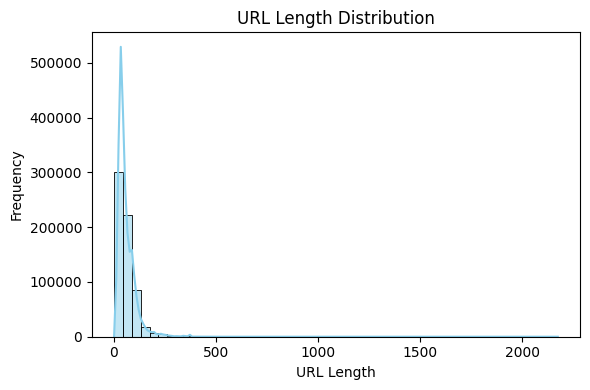

In [10]:

#  URL Length Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['url_length'], bins=50, kde=True, color='skyblue')
plt.title('URL Length Distribution')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-139327154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_https', data=df, palette='Blues')


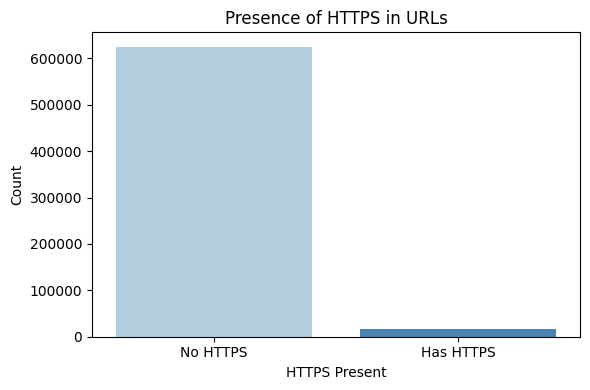

In [11]:
# Presence of HTTPS
plt.figure(figsize=(6, 4))
sns.countplot(x='has_https', data=df, palette='Blues')
plt.title('Presence of HTTPS in URLs')
plt.xlabel('HTTPS Present')
plt.ylabel('Count')
plt.xticks([0, 1], ['No HTTPS', 'Has HTTPS'])
plt.tight_layout()
plt.show()

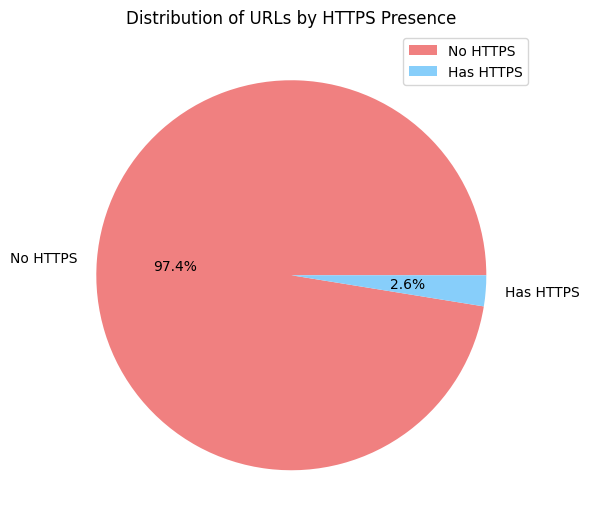

In [12]:

import matplotlib.pyplot as plt
# Presence of HTTPS (Pie Chart)
plt.figure(figsize=(6, 6))
df['has_https'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], labels=['No HTTPS', 'Has HTTPS'])
plt.title('Distribution of URLs by HTTPS Presence')
plt.ylabel('') # Remove default y-label
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-2049195569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_ip', data=df, palette='Reds')


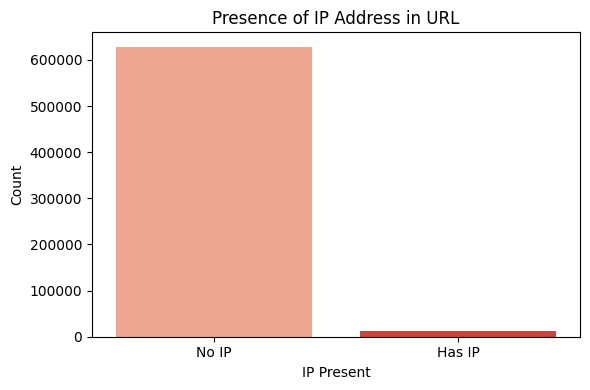

In [13]:

#  Presence of IP in URL
plt.figure(figsize=(6, 4))
sns.countplot(x='has_ip', data=df, palette='Reds')
plt.title('Presence of IP Address in URL')
plt.xlabel('IP Present')
plt.ylabel('Count')
plt.xticks([0, 1], ['No IP', 'Has IP'])
plt.tight_layout()
plt.show()





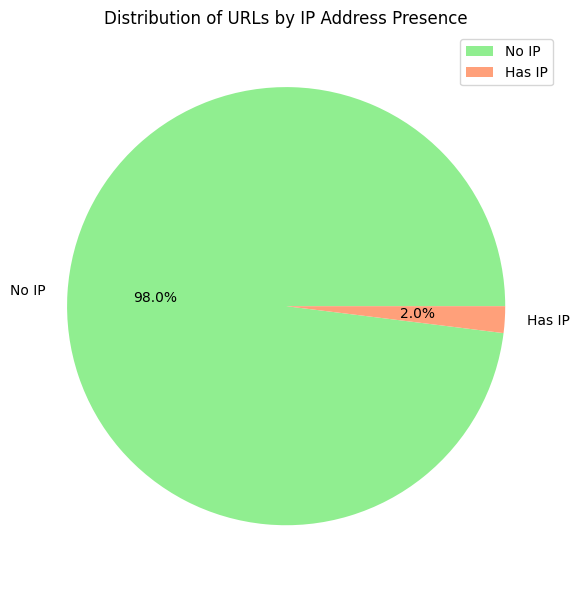

In [14]:

# Presence of IP in URL (Pie Chart)
plt.figure(figsize=(6, 6))
df['has_ip'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightsalmon'], labels=['No IP', 'Has IP'])
plt.title('Distribution of URLs by IP Address Presence')
plt.ylabel('') # Remove default y-label
plt.legend()
plt.tight_layout()
plt.show()

# **Model Development**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
import numpy as np

# Assuming 'type' is the target variable and 'url' is the feature
X = df.drop('type', axis=1)
y = df['type']

# Convert target variable to numerical labels
y = y.astype('category').cat.codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate URL data for Char-CNN
X_train_url = X_train['url']
X_test_url = X_test['url']

# Select engineered features for Gradient Boosting and Logistic Regression
engineered_features = ['url_length', 'has_https', 'num_dots', 'has_ip']
X_train_eng = X_train[engineered_features]
X_test_eng = X_test[engineered_features]

# 1. Char-CNN vs. Gradient Boosting

# Char-CNN
# Tokenize and pad sequences
max_chars = 200  # Maximum number of characters to consider in a URL
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train_url)
vocab_size = len(tokenizer.word_index) + 1

X_train_seq = tokenizer.texts_to_sequences(X_train_url)
X_test_seq = tokenizer.texts_to_sequences(X_test_url)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_chars)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_chars)

# Build Char-CNN model
embedding_dim = 50
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_chars))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10, activation='relu'))
# Change output layer for multi-class classification
cnn_model.add(Dense(len(df['type'].unique()), activation='softmax'))


cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training Char-CNN...")
history = cnn_model.fit(X_train_padded, y_train,
                        epochs=5,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=1) # Set to 1 for progress updates

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Char-CNN Accuracy: {cnn_accuracy:.4f}")

# Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_eng, y_train)
gb_pred = gb_model.predict(X_test_eng)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy (Engineered Features): {gb_accuracy:.4f}")


import time

# --- Evaluate Char-CNN Inference Latency ---
start_time_cnn = time.time()
cnn_preds = cnn_model.predict(X_test_padded, verbose=0)
end_time_cnn = time.time()
cnn_latency = end_time_cnn - start_time_cnn
print(f"Char-CNN Inference Latency: {cnn_latency:.4f} seconds")

# --- Evaluate Gradient Boosting Inference Latency ---
start_time_gb = time.time()
gb_preds = gb_model.predict(X_test_eng)
end_time_gb = time.time()
gb_latency = end_time_gb - start_time_gb
print(f"Gradient Boosting Inference Latency: {gb_latency:.4f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training Char-CNN...
Epoch 1/5
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 477s 148ms/step - accuracy: 0.9080 - loss: 0.2710 - val_accuracy: 0.9670 - val_loss: 0.1056
Epoch 2/5
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 485s 143ms/step - accuracy: 0.9693 - loss: 0.0986 - val_accuracy: 0.9672 - val_loss: 0.1019
Epoch 3/5
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 501s 143ms/step - accuracy: 0.9742 - loss: 0.0812 - val_accuracy: 0.9741 - val_loss: 0.0835
Epoch 4/5
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 466s 145ms/step - accuracy: 0.9770 - loss: 0.0723 - val_accuracy: 0.9671 - val_loss: 0.1041
Epoch 5/5
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 509s 148ms/step - accuracy: 0.9788 - loss: 0.0659 - val_accuracy: 0.9749 - val_loss: 0.0797
Char-CNN Accuracy: 0.9759
Training Gradient Boosting...
Gradient Boosting Accuracy (Engineered Features): 0.7506
Char-CNN Inference Latency: 42.3192 seconds
Gradient Boosting Inference Latency: 0.7032 seconds



--- Char-CNN Evaluation ---
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step
Classification Report (Char-CNN):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85616
           1       0.98      1.00      0.99     19062
           2       0.96      0.93      0.95      4729
           3       0.93      0.91      0.92     18818

    accuracy                           0.98    128225
   macro avg       0.96      0.96      0.96    128225
weighted avg       0.98      0.98      0.98    128225

4008/4008 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step
ROC AUC (Char-CNN - OvR Macro Average): 0.9969

--- Gradient Boosting Evaluation ---
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     85616
           1       0.68      0.41      0.51     19062
           2       0.92      0.77      0.84      4729
           3       0.55      0.28      0.37     18818

    accuracy

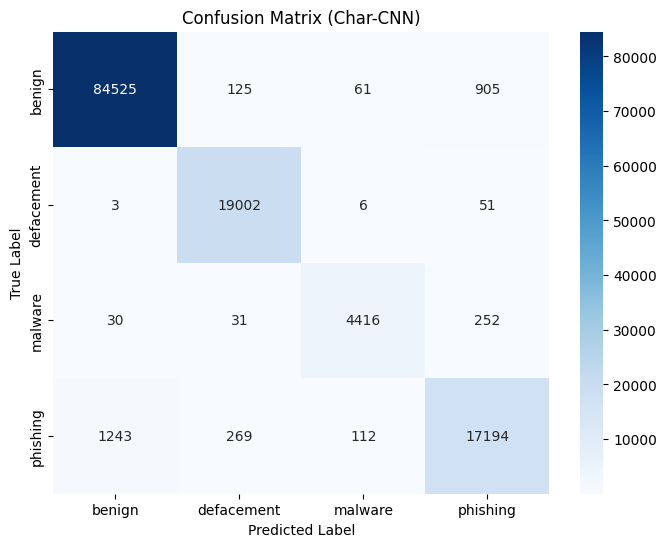

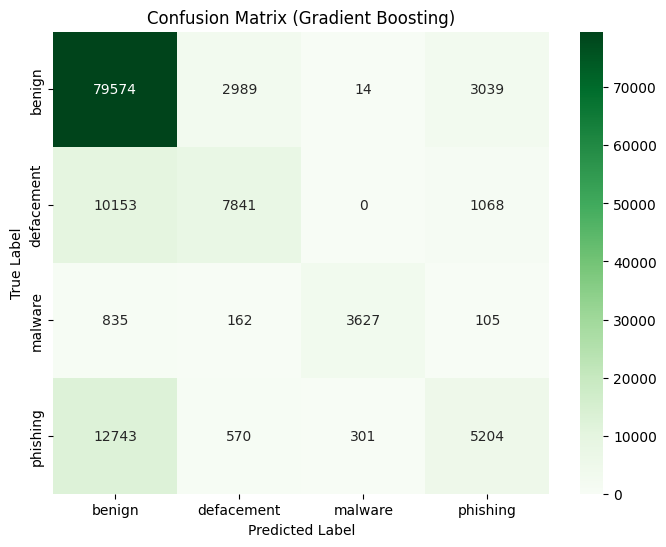


Plotting Char-CNN Training History...


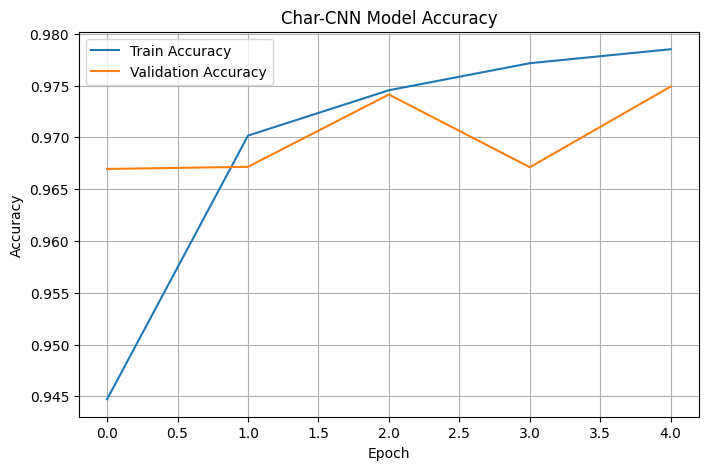

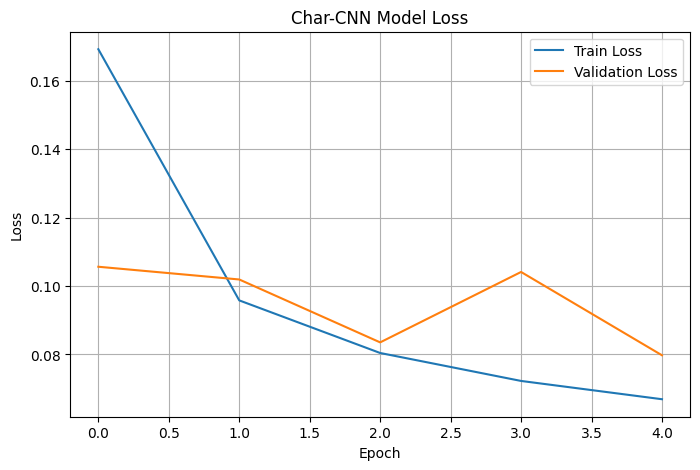


Plotting ROC Curves (One vs Rest)...


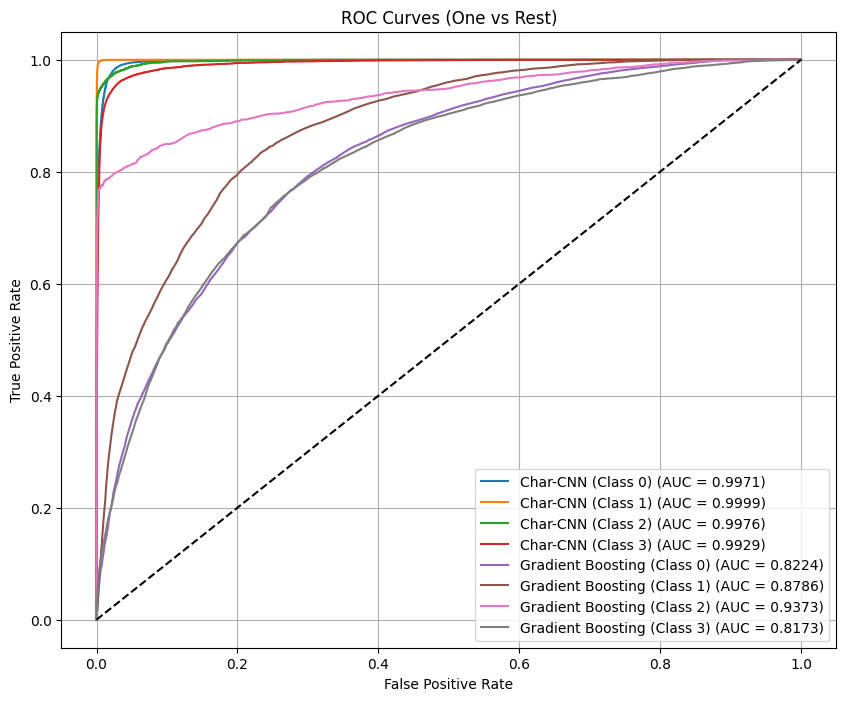

In [17]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import numpy as np

# --- Evaluation on Multiple Performance Metrics ---

# Char-CNN Evaluation
print("\n--- Char-CNN Evaluation ---")
cnn_pred_proba_multi = cnn_model.predict(X_test_padded)
cnn_pred_classes = np.argmax(cnn_pred_proba_multi, axis=1)

print("Classification Report (Char-CNN):")
print(classification_report(y_test, cnn_pred_classes))

# Calculate ROC AUC for multi-class (OvR - One vs Rest)
try:
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_bin = lb.transform(y_test)
    cnn_pred_proba_multi_bin = cnn_model.predict(X_test_padded)

    # Ensure the probability array has the correct shape (n_samples, n_classes)
    if cnn_pred_proba_multi_bin.shape[1] != len(lb.classes_):
         print("Shape mismatch between predicted probabilities and number of classes.")
         print("Cannot calculate multi-class ROC AUC.")
    else:
        cnn_roc_auc_ovr = roc_auc_score(y_test_bin, cnn_pred_proba_multi_bin, average='macro')
        print(f"ROC AUC (Char-CNN - OvR Macro Average): {cnn_roc_auc_ovr:.4f}")

except Exception as e:
    print(f"Could not calculate ROC AUC for Char-CNN: {e}")


# Gradient Boosting Evaluation
print("\n--- Gradient Boosting Evaluation ---")
gb_pred_proba_multi = gb_model.predict_proba(X_test_eng)
gb_pred = gb_model.predict(X_test_eng)


print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, gb_pred))

# Calculate ROC AUC for multi-class (OvR - One vs Rest)
try:
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_bin = lb.transform(y_test)
    gb_pred_proba_multi_bin = gb_model.predict_proba(X_test_eng)

    # Ensure the probability array has the correct shape (n_samples, n_classes)
    if gb_pred_proba_multi_bin.shape[1] != len(lb.classes_):
         print("Shape mismatch between predicted probabilities and number of classes.")
         print("Cannot calculate multi-class ROC AUC.")
    else:
        gb_roc_auc_ovr = roc_auc_score(y_test_bin, gb_pred_proba_multi_bin, average='macro')
        print(f"ROC AUC (Gradient Boosting - OvR Macro Average): {gb_roc_auc_ovr:.4f}")

except Exception as e:
    print(f"Could not calculate ROC AUC for Gradient Boosting: {e}")


# --- Plotting Confusion Matrices ---

print("\nPlotting Confusion Matrices...")

# Char-CNN Confusion Matrix
cnn_cm = confusion_matrix(y_test, cnn_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['type'].astype('category').cat.categories, yticklabels=df['type'].astype('category').cat.categories)
plt.title('Confusion Matrix (Char-CNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Gradient Boosting Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens', xticklabels=df['type'].astype('category').cat.categories, yticklabels=df['type'].astype('category').cat.categories)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Plotting Training History (for Char-CNN) ---

print("\nPlotting Char-CNN Training History...")

# Accuracy History
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Char-CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Accuracy history not available for Char-CNN.")


# Loss History
if 'loss' in history.history and 'val_loss' in history.history:
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Char-CNN Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Loss history not available for Char-CNN.")


# --- Plotting ROC Curves (One vs Rest) ---

print("\nPlotting ROC Curves (One vs Rest)...")

plt.figure(figsize=(10, 8))

# Char-CNN ROC Curves (OvR)
try:
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_bin = lb.transform(y_test)

    # Ensure the model predicts probabilities for each class
    # If the model is binary, we cannot plot multi-class ROC curves directly.
    # Assuming the model was re-trained or is capable of multi-class probability output:
    # If cnn_model.predict(X_test_padded) returns probabilities for each class (shape n_samples, n_classes):
    if cnn_pred_proba_multi.shape[1] == len(lb.classes_):
        for i in range(len(lb.classes_)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], cnn_pred_proba_multi[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Char-CNN (Class {lb.classes_[i]}) (AUC = {roc_auc:.4f})')
    else:
         print("Char-CNN model output shape is not suitable for multi-class ROC curves.")
         print("Ensure the model is trained for multi-class with softmax output.")

except Exception as e:
    print(f"Could not plot ROC curves for Char-CNN: {e}")


# Gradient Boosting ROC Curves (OvR)
try:
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_bin = lb.transform(y_test)
    gb_pred_proba_multi_bin = gb_model.predict_proba(X_test_eng)

    if gb_pred_proba_multi_bin.shape[1] == len(lb.classes_):
        for i in range(len(lb.classes_)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], gb_pred_proba_multi_bin[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Gradient Boosting (Class {lb.classes_[i]}) (AUC = {roc_auc:.4f})')
    else:
        print("Gradient Boosting probability output shape is not suitable for multi-class ROC curves.")


except Exception as e:
    print(f"Could not plot ROC curves for Gradient Boosting: {e}")


plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One vs Rest)')
plt.legend()
plt.grid(True)
plt.show()

# **TF-IDF + Logistic Regression**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import time

# TF-IDF Vectorization (on raw URLs)
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_url)
X_test_tfidf = tfidf_vectorizer.transform(X_test_url)

# Train Logistic Regression
print("Training TF-IDF + Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Evaluate Accuracy
lr_pred = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"TF-IDF + Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Inference Latency
start_time_lr = time.time()
_ = lr_model.predict(X_test_tfidf)
end_time_lr = time.time()
lr_latency = end_time_lr - start_time_lr
print(f"TF-IDF + Logistic Regression Inference Latency: {lr_latency:.4f} seconds")

# Optional: Classification Report
print("\nClassification Report (TF-IDF + LR):")
print(classification_report(y_test, lr_pred))


Training TF-IDF + Logistic Regression...
TF-IDF + Logistic Regression Accuracy: 0.9660
TF-IDF + Logistic Regression Inference Latency: 0.1068 seconds

Classification Report (TF-IDF + LR):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85616
           1       0.98      0.99      0.99     19062
           2       0.98      0.91      0.94      4729
           3       0.91      0.86      0.89     18818

    accuracy                           0.97    128225
   macro avg       0.96      0.94      0.95    128225
weighted avg       0.97      0.97      0.97    128225



ROC AUC (TF-IDF + Logistic Regression - OvR Macro Average): 0.9948

Plotting ROC Curves (One vs Rest) for Logistic Regression...


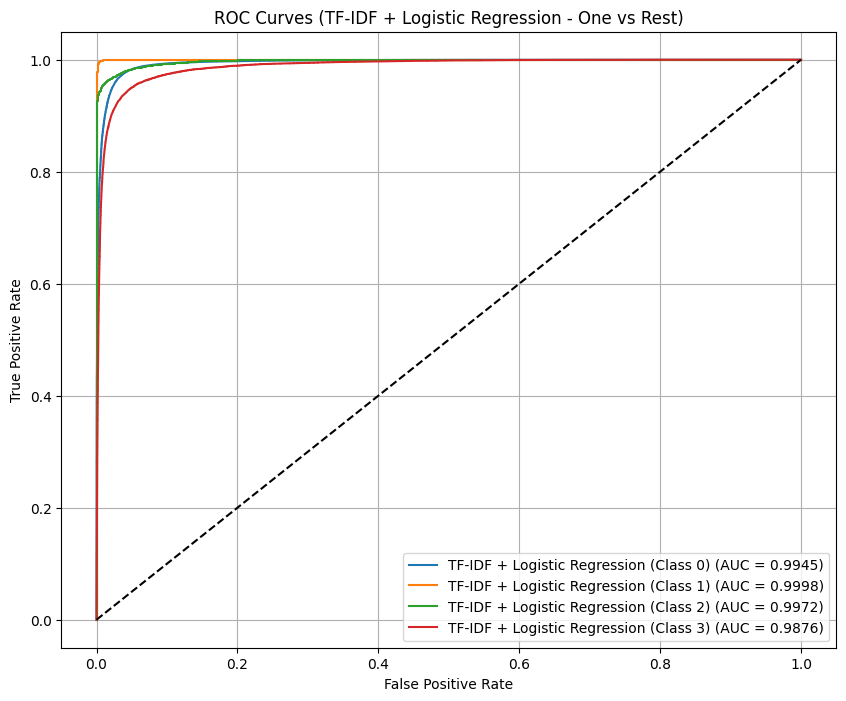

In [21]:

import matplotlib.pyplot as plt
# Calculate ROC AUC for multi-class (OvR - One vs Rest) for Logistic Regression
try:
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test_bin = lb.transform(y_test)
  lr_pred_proba_multi_bin = lr_model.predict_proba(X_test_tfidf)

  # Ensure the probability array has the correct shape (n_samples, n_classes)
  if lr_pred_proba_multi_bin.shape[1] != len(lb.classes_):
       print("Shape mismatch between predicted probabilities and number of classes.")
       print("Cannot calculate multi-class ROC AUC for Logistic Regression.")
  else:
      lr_roc_auc_ovr = roc_auc_score(y_test_bin, lr_pred_proba_multi_bin, average='macro')
      print(f"ROC AUC (TF-IDF + Logistic Regression - OvR Macro Average): {lr_roc_auc_ovr:.4f}")

except Exception as e:
  print(f"Could not calculate ROC AUC for TF-IDF + Logistic Regression: {e}")

# Plot ROC Curves for Logistic Regression (OvR)
print("\nPlotting ROC Curves (One vs Rest) for Logistic Regression...")

plt.figure(figsize=(10, 8))

try:
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_bin = lb.transform(y_test)
    lr_pred_proba_multi_bin = lr_model.predict_proba(X_test_tfidf)

    if lr_pred_proba_multi_bin.shape[1] == len(lb.classes_):
        for i in range(len(lb.classes_)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], lr_pred_proba_multi_bin[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'TF-IDF + Logistic Regression (Class {lb.classes_[i]}) (AUC = {roc_auc:.4f})')
    else:
        print("Logistic Regression probability output shape is not suitable for multi-class ROC curves.")

except Exception as e:
    print(f"Could not plot ROC curves for Logistic Regression: {e}")


plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (TF-IDF + Logistic Regression - One vs Rest)')
plt.legend()
plt.grid(True)
plt.show()